# Clean and Analyze Employee Exit Surveys

This project will evaluate exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) intitute in Queensland, Australia. The analysis will aim to answer the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


# Import Data and Initial Exploration

In [1]:
# import libraries and read in data

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', na_values="Not Stated")
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv',  encoding = "Latin-1")

dete_survey has 822 rows and 56 columns.
tafe_survey has 702 rows and 72 columns.

In [2]:
dete_survey["DETE Start Date"].unique()
# initially, missing data was reported as 'Not Stated'. To assist with analysis, these values were replaced with NaN
# when the data was read in

array([ 1984.,    nan,  2011.,  2005.,  1970.,  1994.,  1972.,  1988.,
        2009.,  1997.,  1999.,  1998.,  1967.,  2007.,  1995.,  1996.,
        2006.,  1989.,  1982.,  1980.,  1973.,  1981.,  1974.,  1975.,
        1978.,  2003.,  2000.,  1977.,  1976.,  1985.,  2008.,  1963.,
        1993.,  1979.,  1990.,  1969.,  1966.,  2010.,  1968.,  1991.,
        1971.,  2002.,  1986.,  2004.,  2012.,  1983.,  2001.,  1987.,
        1992.,  2013.,  1965.])

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

# Drop Irrelevant Columns and Standardise Column Names

In [4]:
# drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.iloc[:,28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:,17:66], axis=1)


In [5]:
# standardise column names for dete_survey_updated
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [6]:
# standardise relevant columns in tafe_survey_updated to match dete_survey_updated
col_map = {'Record ID': 'id', 
           'CESSATION YEAR': 'cease_date', 
           'Reason for ceasing employment': 'separationtype', 
           'Gender. \xa0\xa0\xa0\xa0What is your Gender?': 'gender',
           'CurrentAge. \xa0\xa0\xa0\xa0Current Age': 'age', 
           'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status',       
           'Classification. \xa0\xa0\xa0\xa0Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(columns=col_map, inplace=True)

# Filter Data

In [7]:
# We'll need to filter our data so we're only analysing employees who resigned.
dete_survey_updated["separationtype"].value_counts()

# dete_survey_updated contains three resignation types: 
# * Resignation-Other reasons
# * Resignation-Other employer
# * Resignation-Move overseas/interstate

# let's filter our results by cells containing only these 3 resignation types:
dete_resignations = dete_survey_updated.loc[dete_survey_updated["separationtype"].str.contains(r"Resignation")]



In [8]:
# we'll filter the tafe_survey_updated data in a similar fashion

tafe_survey_updated["separationtype"].value_counts()

tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated["separationtype"] == "Resignation"]

tafe_resignations.head(10)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,634157899735969000,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36  40,Temporary Full-time,Tutor,3-4,3-4
9,634158812168312000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21  25,Permanent Full-time,Administration (AO),1-2,1-2
10,634158825838625000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41  45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,634172522831440000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31  35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,634172609223344000,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31  35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [9]:
pd.set_option('mode.chained_assignment', None)

# the cease_date data in dete_resignations needs cleaning to remove the months in some of the cells
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:]

# in addition, the data type needs to be converted from object to float
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

Next we'll review the values in the cease_date and dete_start_date columns in dete_resignations, and the cease_date column in tafe_resignations, to make sure we don't have any years that are likely incorrect.

In [10]:
dete_resignations['cease_date'].value_counts().sort_index()

dete_resignations['dete_start_date'].value_counts().sort_index()

tafe_resignations['cease_date'].value_counts().sort_index()



2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

There aren't any values that are unrealistic (i.e. prior to 1940)


# Create New Column

tafe_resignations already has a column ('institute service') which provides the employee's years of service.

We'll create an equivalent for dete_resignations

In [11]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

tafe_survey_updated contains a 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' column. tafe_survey_updated.value_counts on these columns shows that the cells either contain NaN, '-' or 'Job Dissatifaction'.  We'll replace these values with NaN, False, or True, respectively.

In [12]:
def update_vals(element):
    if pd.isna(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

tafe_resignations_up = tafe_resignations.copy()

# creates a new column 'dissatisfied'. If either of the 'contributing factors' columns contain true, then true is designated
# to the # dissatisfied column for that particular employee. 
tafe_resignations_up["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1,skipna=False)

tafe_resignations_up.head(10)


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,634157899735969000,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36  40,Temporary Full-time,Tutor,3-4,3-4,False
9,634158812168312000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21  25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,634158825838625000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41  45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,634172522831440000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31  35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,634172609223344000,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31  35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


dete_resignations contains several columns with True/False values for whether they were dissatisfied due to specific reasons (i.e. physical work environment, workload etc.). We'll create a new column 'dissatisfied' which contains True if any of these columns contain True for a particular employee. 

In [13]:
dissatisfaction_columns = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", 
                           "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions",
                           "work_life_balance", "workload"]

dete_resignations_up = dete_resignations.copy()

dete_resignations_up["dissatisfied"] = dete_resignations[dissatisfaction_columns].any(axis=1,skipna=False)



# Combining the Data

In [14]:
# to prepare our data for merging, we'll need to create a new column to track whether the original data is from 
# DETE or TAFE

dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [15]:
# combine our two data sets

combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, sort=False)
combined.head(10)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop all columns with less than 500 non null values 

combined.dropna(axis=1, thresh=500, inplace=True)


# Clean the Service Column

Next we'll need to clean the institute_service column, which contains data in a variety of forms, for example:
* less than 1 year
* 4
* 7-10
* more than 20 years

We'll modify the data according to career stage instead of age, using the following definitions:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [17]:
# extract numbers from instute service column
combined["institute_service"] = combined["institute_service"].astype(str).str.extract('(\d+)')

#convert numbers to floats
combined["institute_service"] = combined["institute_service"].astype(float)

# function to convert floats to categories based on definitions in above cell
def years_to_definition(element):
    if pd.isna(element):
        return np.nan
    elif element < 3:
        return "New"
    elif element < 6:
        return "Experienced"
    elif element < 10:
        return "Established"
    else:
        return "Veteran"

# map data and assign to column service_cat
combined["service_cat"] = combined['institute_service'].map(years_to_definition)

combined.head()



,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,4,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
5,6,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
8,9,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
9,10,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
11,12,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


In [18]:
combined["dissatisfied"].value_counts(dropna=False)
# There are 403 False values, 240 True values and 8 NaN values. We'll replace the NaN values with the most common value
# i.e. False

combined["dissatisfied"].fillna(False, inplace=True)

dissatisfied_by_service_cat = combined.pivot_table(index='service_cat', values='dissatisfied')

dissatisfied_by_service_cat

,dissatisfied
service_cat,
Established,0.561644
Experienced,0.316129
New,0.295337
Veteran,0.471831


# Perform Some Initial Analysis

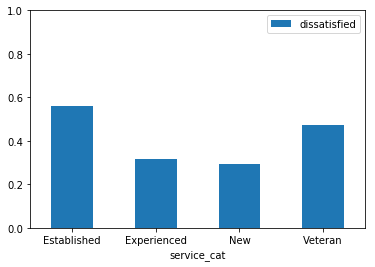

In [19]:
dissatisfied_by_service_cat.plot(kind='bar', rot=0, ylim=(0,1))

plt.show()


Conclusion: The data suggests that on average, Established and Veteran employees tend to resign due to dissatisfaction more often than Experienced or New employees.  Approximately 56% of Established and 47% of Veteran employees reported resigning due to dissatisfaction, compared to 32% of Experienced employees and 30% of New employees. 

In [20]:
# Next we'll explore whether older or younger employees are resigning due to some kind of dissatisfaction.

combined['age'].value_counts()

# The formats of the age data vary greatly (i.e. the tafe age data has the latin-1 encoding of '-' and will need to be
# cleaned). There is also inconsistent spacing of the tafe vs dete age data. 

51-55            71
41-45            48
41  45          45
46-50            42
36-40            41
46  50          39
26-30            35
21  25          33
26  30          32
36  40          32
31  35          32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [21]:
# The dete data has an extra age range backet. Specifically, the tafe data groups the oldest employees noted as '56 or older'
# The dete data however has their eldest employees noted as '60 or older'.  We'll need to rename the '56-60' and 
# '60 or older' cells these cells to '56 or older' to be consistent.

combined['age'] = combined['age'].str.replace(' ','').str.replace('56orolder', '56 or older').str.replace('61orolder', '56 or older').str.replace('20oryounger', '20 or younger').str.replace('\x96', '-').str.replace('56-60','56 or older')

In [22]:
# confirm that age data has been sufficiently cleaned.
combined['age'].value_counts(dropna=False)

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
20 or younger    10
Name: age, dtype: int64

In [23]:
# drop NaN values in age column
combined['age'].dropna(inplace=True)

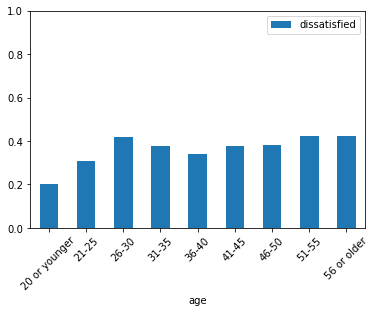

In [24]:
dissatisfied_by_age_group = combined.pivot_table(index='age', values='dissatisfied')

dissatisfied_by_age_group.plot(kind='bar', rot=45, ylim=(0,1))

plt.show()


Conclusion: The data suggests that on average, employees who are aged 25 or less tend to resign due to dissatisfaction less often than those 26 or older. On average, approximately 40% of employees aged 26 years or older resign due to dissatisfaction. 